In [4]:
print("hello world")

hello world


In [5]:
from sklearn.datasets import make_blobs
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure 
import random

Setting Standard Seed

In [6]:
random.seed(7) #this generates the random numbers with the fixed seed which means it will generate the same random numbers 
np.random.seed(7)

Creating Sythetic Data 

In [7]:
x_train, _= make_blobs(n_samples= 1000 , n_features= 2, centers= 3, random_state= 20)
print(type(x_train))

'''we use scikit-learn's make_blobs function to generate random data points. 
In the first call to make_blobs, we don't specify random_state, so the data will be different each time we run the code. 
In the second call, we specify random_state=42, ensuring that we get the same data points every time we run the code.'''


<class 'numpy.ndarray'>


"we use scikit-learn's make_blobs function to generate random data points. \nIn the first call to make_blobs, we don't specify random_state, so the data will be different each time we run the code. \nIn the second call, we specify random_state=42, ensuring that we get the same data points every time we run the code."

Visualization of Data

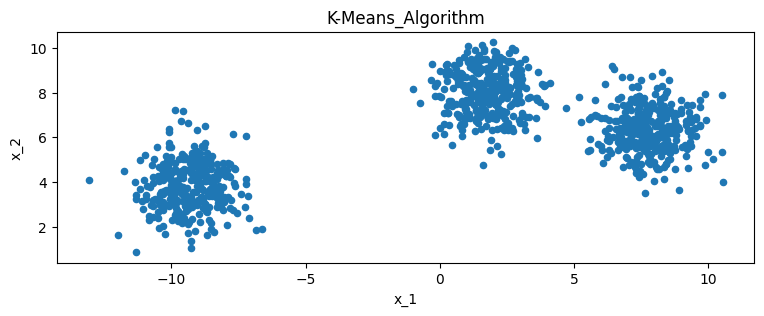

In [8]:
df = DataFrame(dict(x = x_train[:,0], y =x_train[:, 1]))

fig, ax = plt.subplots(figsize = ( 9,3))
df.plot(ax = ax , kind = 'scatter', x = 'x', y = 'y')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title("K-Means_Algorithm")
plt.show()


Initializing Functions 

In [9]:
def get_initial_ceters(x, k):
    " x is nd.array training data , k is cetroids which will be selected from x"
    number_of_smaples = x.shape[0]
    sample_point_ids = random.sample(range(0, number_of_smaples), k) # it will generate the idexes of centroids 
    centroids = [tuple(x[id]) for id in sample_point_ids]
    unique_centroids = list(set(centroids))  # to detlete the dupllicates 
    number_of_unique_centroids = len(unique_centroids)

    while number_of_unique_centroids < k :
        new_sample_point_ids = random.sample(range(0, number_of_smaples), k - number_of_unique_centroids)
        new_centroids = [tuple(x[id] for id in new_sample_point_ids)]
        unique_centroids = list(set(new_centroids + unique_centroids))
        number_of_unique_centroids = len(unique_centroids)

    return np.array(unique_centroids)

Example with ndArray 

In [10]:
x = np.array([[1,1,1], [2,2,2], [3,3,3], [4,4,4]])

k = 2
print(f"Dataset:\n {x}")
print(f"Datashape : {x.shape}")
print(f"for given {k} we got initial centroids :{get_initial_ceters(x, k)}")

Dataset:
 [[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]]
Datashape : (4, 3)
for given 2 we got initial centroids :[[1 1 1]
 [3 3 3]]


In [11]:
def get_euclidean_distance(A_matrix, B_matrix):
    """
    Function computes euclidean distance between matrix A and B.
    E. g. C[2,15] is distance between point 2 from A (A[2]) matrix and point 15 from matrix B (B[15])
    Args:
        A_matrix (numpy.ndarray): Matrix size N1:D
        B_matrix (numpy.ndarray): Matrix size N2:D

    Returns:
        numpy.ndarray: Matrix size N1:N2
    """
    A_square = np.reshape(np.sum(A_matrix * A_matrix, axis= 1), (A_matrix.shape[0], 1)) #means sum of squares of elements of each row alonb coloumn
    B_square = np.reshape(np.sum(B_matrix * B_matrix, axis= 1), (1,B_matrix.shape[0]))  # it reshapes the matrix 
    AB = A_matrix @ B_matrix.T
    C = -2*AB + A_square + B_square 

    return np.sqrt(C)
   

Lets try with an Example 

In [15]:
A = np.array([[1,2], [2, 3], [3,4]])
B = np.array([[0,1]])

print(f"A :\n {A}")
print(f"B :\n {B}")
print(f"Euclidean distance between A and B is:\n {get_euclidean_distance(A,B)}")

A :
 [[1 2]
 [2 3]
 [3 4]]
B :
 [[0 1]]
Euclidean distance between A and B is:
 [[1.41421356]
 [2.82842712]
 [4.24264069]]


In [ ]:
def 

Finding New Clusters 